In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
col_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred


In [14]:
# Create fred object and Check if it works
fred = Fred(api_key="Input Fred Api Key")
print("API Key Loaded:", bool(fred))

API Key Loaded: True


In [15]:
# search economic data
df = fred.search('S&P', order_by='popularity')
df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-10-26,2025-10-26,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-10-23,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-10-24 09:11:52-05:00,99,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2025-10-26,2025-10-26,S&P 500,2015-10-26,2025-10-24,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-10-24 19:01:58-05:00,92,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2025-10-26,2025-10-26,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-09-30 08:11:02-05:00,86,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-10-26,2025-10-26,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-10-23,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-10-24 09:11:56-05:00,86,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-10-26,2025-10-26,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-10-23,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-10-24 09:13:04-05:00,86,The ICE BofA Option-Adjusted Spreads (OASs) ar...


In [16]:
df.shape

(1000, 15)

# Pull raw data

In [19]:
sp500 = fred.get_series("SP500")
sp500

2015-10-26    2071.18
2015-10-27    2065.89
2015-10-28    2090.35
2015-10-29    2089.41
2015-10-30    2079.36
               ...   
2025-10-20    6735.13
2025-10-21    6735.35
2025-10-22    6699.40
2025-10-23    6738.44
2025-10-24    6791.69
Length: 2610, dtype: float64

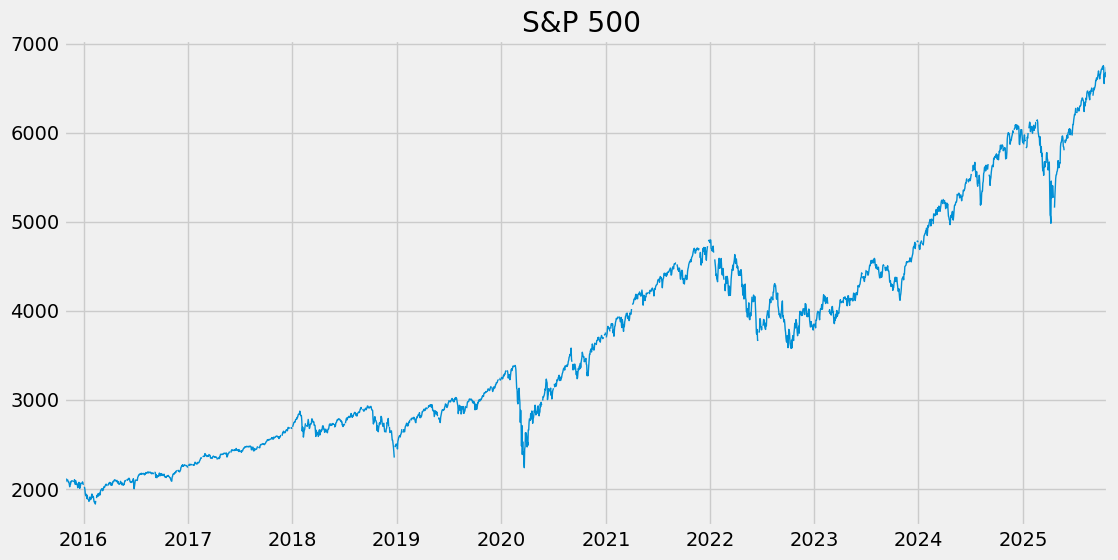

In [20]:
# Plot the data
sp500.plot(figsize=(12,6), title='S&P 500 ', lw=1)
plt.show()

### Pull and join multiple data series



In [31]:
unemp_results = fred.search("unemployment")

In [52]:
unemp_results.head(20)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-10-26,2025-10-26,Unemployment Rate,1948-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:01-05:00,98,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-10-26,2025-10-26,Unemployment Rate,1948-01-01,2025-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-09-05 07:50:03-05:00,59,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-10-26,2025-10-26,Unemployment Level,1948-01-01,2025-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-09-05 07:51:04-05:00,73,The series comes from the 'Current Population ...
NROU,NROU,2025-10-26,2025-10-26,Noncyclical Rate of Unemployment,1949-01-01,2035-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2025-03-17 15:44:05-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2025-10-26,2025-10-26,Continued Claims (Insured Unemployment),1967-01-07,2025-09-13,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-09-25 07:33:02-05:00,71,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2025-10-26,2025-10-26,Continued Claims (Insured Unemployment),1967-01-07,2025-09-13,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2025-09-25 07:33:05-05:00,43,"Continued claims, also referred to as insured ..."
U6RATE,U6RATE,2025-10-26,2025-10-26,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:04-05:00,71,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2025-10-26,2025-10-26,Unemployment Level,1948-01-01,2025-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2025-09-05 07:50:08-05:00,29,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2025-10-26,2025-10-26,Unemployment Rate - Black or African American,1972-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:06-05:00,70,The series comes from the 'Current Population ...


In [39]:
unemploy = fred.get_series("UNEMPLOY")

In [47]:
unemploy

1948-01-01    2034.0
1948-02-01    2328.0
1948-03-01    2399.0
1948-04-01    2386.0
1948-05-01    2118.0
               ...  
2025-04-01    7166.0
2025-05-01    7237.0
2025-06-01    7015.0
2025-07-01    7236.0
2025-08-01    7384.0
Length: 932, dtype: float64

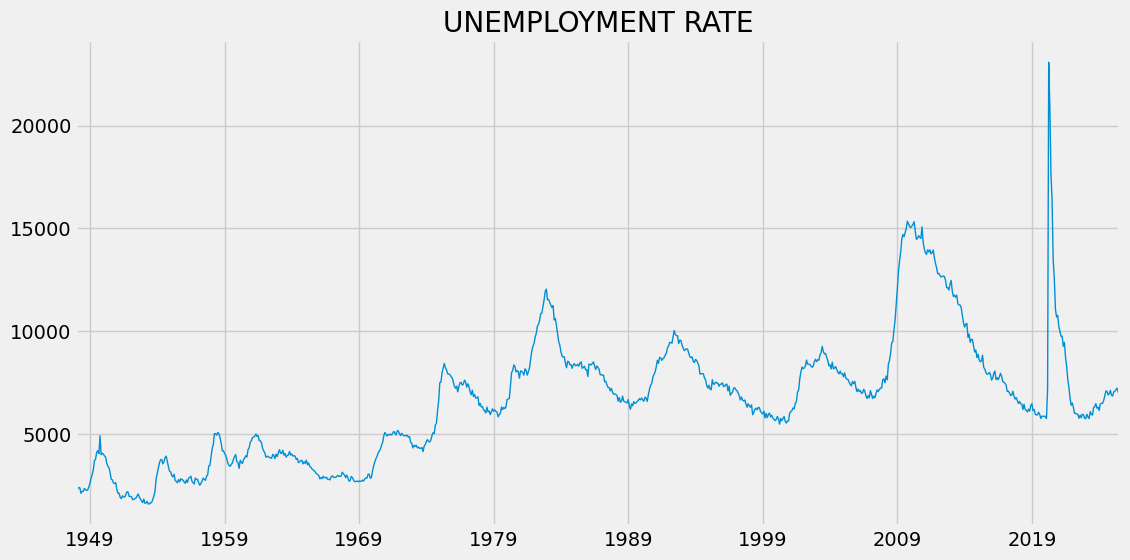

In [181]:
unemploy.plot(figsize=(12,6), title='UNEMPLOYMENT RATE', lw=1)
plt.show()

In [180]:
unemp_state = fred.search("unemployment state", filter=("frequency", "Monthly"))

In [67]:
unemp_state

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-10-26,2025-10-26,Unemployment Rate,1948-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:01-05:00,98,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-10-26,2025-10-26,Unemployment Rate,1948-01-01,2025-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-09-05 07:50:03-05:00,59,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-10-26,2025-10-26,Unemployment Level,1948-01-01,2025-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-09-05 07:51:04-05:00,73,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2025-10-26,2025-10-26,Unemployment Level,1948-01-01,2025-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2025-09-05 07:50:08-05:00,29,The series comes from the 'Current Population ...
U6RATE,U6RATE,2025-10-26,2025-10-26,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:04-05:00,71,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN220890000000005,LAUCN220890000000005,2025-10-26,2025-10-26,"Employed Persons in St. Charles Parish, LA",1990-01-01,2025-08-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2025-10-01 10:29:26-05:00,1,These data come from the Current Population Su...
LAUCN210790000000005,LAUCN210790000000005,2025-10-26,2025-10-26,"Employed Persons in Garrard County, KY",1990-01-01,2025-08-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2025-10-01 10:30:51-05:00,1,These data come from the Current Population Su...
IADESM7LFN,IADESM7LFN,2025-10-26,2025-10-26,"Civilian Labor Force in Des Moines County, IA",1990-01-01,2025-08-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2025-10-01 10:31:39-05:00,1,These data come from the Current Population Su...


In [93]:
# filter the frequency by monthly
unemp_df = fred.search("unemployment rate state", filter=("frequency", "Monthly"))

In [94]:
# get data in the Seasonally Adjusted and the units in Percent
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [95]:
# get the values in the title columns
unemp_df['title']

series id
UNRATE                                             Unemployment Rate
U6RATE             Total Unemployed, Plus All Persons Marginally ...
LNS14000006            Unemployment Rate - Black or African American
LNS14000024                       Unemployment Rate - 20 Yrs. & over
CAUR                                 Unemployment Rate in California
                                         ...                        
AKUR                                     Unemployment Rate in Alaska
SCUR                             Unemployment Rate in South Carolina
INUR                                    Unemployment Rate in Indiana
LRUN64TTUSM156S    Infra-Annual Labor Statistics: Unemployment Ra...
USSLIND                          Leading Index for the United States
Name: title, Length: 68, dtype: object

In [ ]:
# get the data boolean for where title has 'Unemployment Rate'
unemp_df['title'].str.contains("Unemployment Rate").head()

In [137]:
# locate data where the titlte contains Unemployment Rate
unemp_df = unemp_df.loc[unemp_df['title'].str.contains("Unemployment Rate")]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-10-26,2025-10-26,Unemployment Rate,1948-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:01-05:00,98,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-10-26,2025-10-26,Unemployment Rate - Black or African American,1972-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:06-05:00,70,The series comes from the 'Current Population ...
LNS14000024,LNS14000024,2025-10-26,2025-10-26,Unemployment Rate - 20 Yrs. & over,1948-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:09-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2025-10-26,2025-10-26,Unemployment Rate in California,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:54:02-05:00,66,None
LNS14024887,LNS14024887,2025-10-26,2025-10-26,Unemployment Rate - 16-24 Yrs.,1948-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:11-05:00,61,The series comes from the 'Current Population ...
NYUR,NYUR,2025-10-26,2025-10-26,Unemployment Rate in New York,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:53:04-05:00,56,None
U2RATE,U2RATE,2025-10-26,2025-10-26,Unemployment Rate - Job Losers (U-2),1967-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:13-05:00,56,The series comes from the 'Current Population ...
TXUR,TXUR,2025-10-26,2025-10-26,Unemployment Rate in Texas,1976-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-19 09:53:03-05:00,55,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2025-10-26,2025-10-26,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,52,Series Is Presented Here As Three Variables--(...


In [133]:
# Loop through each series ID in unemp_df, fetch its corresponding time series data from FRED,
# convert it into a DataFrame (naming the column with the series ID), 
# and store all individual DataFrames in a list called all_results for later merging or analysis.

all_results = []
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [141]:
# concatenate the list
unemp_results = pd.concat(all_results, axis=1)

In [143]:
# output the unemp_results
unemp_results

,UNRATE,LNS14000006,LNS14000024,CAUR,LNS14024887,NYUR,U2RATE,TXUR,M0892AUSM156SNBR,LNS14000002,FLUR,M0892BUSM156SNBR,LNS14000003,LNS14027662,LNS14027660,LNS14000009,ALUR,LNS14000001,LNS14000036,ILUR,LNS14000012,VAUR,MIUR,LNS14000031,MAUR,GAUR,OHUR,PAUR,NCUR,LNS14027659,LNS14000060,WAUR,WIUR,LASMT261982000000003,DCUR,NJUR,ORUR,NVUR,KYUR,LAUR,PRUR,LNS14032183,COUR,AZUR,TNUR,MNUR,WVUR,LASMT534266000000003,HIUR,MSUR,MDUR,LNS14000032,IAUR,MOUR,NDUR,AKUR,SCUR,INUR,LRUN64TTUSM156S
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,4.2,6.3,3.8,5.3,9.6,4.2,2.0,4.1,NaN,4.0,3.7,NaN,3.8,2.5,4.0,5.2,3.3,4.4,8.2,4.8,13.0,3.3,5.5,5.6,4.6,3.6,4.9,3.9,3.7,6.1,3.5,4.4,3.3,5.1,5.8,4.8,4.7,5.6,5.2,4.4,5.5,3.0,4.8,4.1,3.5,3.2,3.8,4.3,2.9,4.0,3.1,6.1,3.5,3.9,2.6,4.7,4.2,3.9,4.298340
2025-05-01,4.2,6.0,3.9,5.3,9.7,4.0,2.0,4.1,NaN,4.2,3.7,NaN,3.8,2.6,4.5,5.1,3.3,4.3,8.2,4.8,13.4,3.4,5.4,5.2,4.8,3.5,4.9,3.9,3.7,5.5,3.6,4.5,3.3,5.0,5.9,4.8,4.8,5.5,5.0,4.5,5.5,3.6,4.8,4.1,3.5,3.3,3.7,4.4,2.8,4.0,3.2,6.2,3.6,4.0,2.5,4.7,4.1,3.7,4.321874
2025-06-01,4.1,6.8,3.7,5.4,10.0,4.0,1.9,4.0,NaN,3.9,3.7,NaN,3.6,2.5,4.0,4.8,3.2,4.3,8.2,4.6,14.4,3.5,5.3,6.9,4.8,3.5,4.9,4.0,3.7,5.8,3.3,4.5,3.2,4.8,5.9,4.9,4.9,5.4,4.9,4.5,5.5,3.5,4.7,4.1,3.5,3.3,3.7,4.4,2.8,4.0,3.3,5.8,3.7,4.0,2.5,4.7,4.1,3.6,4.192719
2025-07-01,4.2,7.2,3.8,5.5,10.0,4.0,2.0,4.0,NaN,4.1,3.7,NaN,3.7,2.7,4.4,5.0,3.0,4.4,7.9,4.6,15.2,3.6,5.3,7.0,4.8,3.4,5.0,4.0,3.7,5.5,3.6,4.5,3.1,4.8,6.0,4.9,4.9,5.4,4.9,4.5,5.5,3.9,4.5,4.1,3.6,3.5,3.7,4.3,2.7,3.9,3.4,6.3,3.7,4.1,2.5,4.8,4.2,3.6,4.334479


In [204]:
# check the unemp_states df that has null values
unemp_states[unemp_states.isna().any(axis=1)].shape

(1145, 58)

In [191]:
# drop the non state column
unemp_states = unemp_results.drop('UNRATE', axis=1)

In [203]:
# check the columns that has null values more than 50%
unemp_states.columns[unemp_states.isna().mean()*100 > 50]

Index(['M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'LNS14027662', 'LNS14027660',
       'LNS14027659', 'LASMT261982000000003', 'LNS14032183',
       'LASMT534266000000003'],
      dtype='object')

In [205]:
# drop the columns that has null vakues mire than 50%
unemp_states = unemp_states.drop(columns=unemp_states.columns[unemp_states.isna().mean()*100 > 50])

In [208]:
# check columns again to make sure null values is nnot more than 50%
unemp_states.isna().mean()*100 > 50

LNS14000006        False
LNS14000024        False
CAUR               False
LNS14024887        False
NYUR               False
U2RATE             False
TXUR               False
LNS14000002        False
FLUR               False
LNS14000003        False
LNS14000009        False
ALUR               False
LNS14000001        False
LNS14000036        False
ILUR               False
LNS14000012        False
VAUR               False
MIUR               False
LNS14000031        False
MAUR               False
GAUR               False
OHUR               False
PAUR               False
NCUR               False
LNS14000060        False
WAUR               False
WIUR               False
DCUR               False
NJUR               False
ORUR               False
NVUR               False
KYUR               False
LAUR               False
PRUR               False
COUR               False
AZUR               False
TNUR               False
MNUR               False
WVUR               False
HIUR               False


In [157]:
# # Fill missing values in each numeric column with the respective column mean
# for column in unemp_states.columns:
#     if unemp_states[column].dtype != "object":
#         column_mean = unemp_states[column].mean()
#         unemp_states[column].fillna(column_mean,inplace=True)

In [210]:
# Fill missing values in each numeric column with the respective column mean
unemp_states = unemp_states.fillna(unemp_states.mean())

In [220]:
unemp_states

,LNS14000006,LNS14000024,CAUR,LNS14024887,NYUR,U2RATE,TXUR,LNS14000002,FLUR,LNS14000003,LNS14000009,ALUR,LNS14000001,LNS14000036,ILUR,LNS14000012,VAUR,MIUR,LNS14000031,MAUR,GAUR,OHUR,PAUR,NCUR,LNS14000060,WAUR,WIUR,DCUR,NJUR,ORUR,NVUR,KYUR,LAUR,PRUR,COUR,AZUR,TNUR,MNUR,WVUR,HIUR,MSUR,MDUR,LNS14000032,IAUR,MOUR,NDUR,AKUR,SCUR,INUR,LRUN64TTUSM156S
1929-04-01,11.338354,4.989163,7.109228,11.587017,6.385906,3.02983,5.875671,5.918777,5.979866,5.131395,8.440952,6.62047,5.546781,9.239163,6.730705,15.922639,4.495134,7.586409,10.308385,5.455369,5.704027,6.464765,6.230705,5.624664,4.54603,6.635235,5.179362,7.316946,6.169295,6.682047,6.600336,6.440101,6.835906,13.932323,5.231879,6.086913,6.068792,4.667114,7.672483,4.675168,7.117617,5.051678,9.65264,4.448658,5.649497,3.657383,7.53943,6.093624,5.799664,6.153756
1929-05-01,11.338354,4.989163,7.109228,11.587017,6.385906,3.02983,5.875671,5.918777,5.979866,5.131395,8.440952,6.62047,5.546781,9.239163,6.730705,15.922639,4.495134,7.586409,10.308385,5.455369,5.704027,6.464765,6.230705,5.624664,4.54603,6.635235,5.179362,7.316946,6.169295,6.682047,6.600336,6.440101,6.835906,13.932323,5.231879,6.086913,6.068792,4.667114,7.672483,4.675168,7.117617,5.051678,9.65264,4.448658,5.649497,3.657383,7.53943,6.093624,5.799664,6.153756
1929-06-01,11.338354,4.989163,7.109228,11.587017,6.385906,3.02983,5.875671,5.918777,5.979866,5.131395,8.440952,6.62047,5.546781,9.239163,6.730705,15.922639,4.495134,7.586409,10.308385,5.455369,5.704027,6.464765,6.230705,5.624664,4.54603,6.635235,5.179362,7.316946,6.169295,6.682047,6.600336,6.440101,6.835906,13.932323,5.231879,6.086913,6.068792,4.667114,7.672483,4.675168,7.117617,5.051678,9.65264,4.448658,5.649497,3.657383,7.53943,6.093624,5.799664,6.153756
1929-07-01,11.338354,4.989163,7.109228,11.587017,6.385906,3.02983,5.875671,5.918777,5.979866,5.131395,8.440952,6.62047,5.546781,9.239163,6.730705,15.922639,4.495134,7.586409,10.308385,5.455369,5.704027,6.464765,6.230705,5.624664,4.54603,6.635235,5.179362,7.316946,6.169295,6.682047,6.600336,6.440101,6.835906,13.932323,5.231879,6.086913,6.068792,4.667114,7.672483,4.675168,7.117617,5.051678,9.65264,4.448658,5.649497,3.657383,7.53943,6.093624,5.799664,6.153756
1929-08-01,11.338354,4.989163,7.109228,11.587017,6.385906,3.02983,5.875671,5.918777,5.979866,5.131395,8.440952,6.62047,5.546781,9.239163,6.730705,15.922639,4.495134,7.586409,10.308385,5.455369,5.704027,6.464765,6.230705,5.624664,4.54603,6.635235,5.179362,7.316946,6.169295,6.682047,6.600336,6.440101,6.835906,13.932323,5.231879,6.086913,6.068792,4.667114,7.672483,4.675168,7.117617,5.051678,9.65264,4.448658,5.649497,3.657383,7.53943,6.093624,5.799664,6.153756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,6.300000,3.800000,5.300000,9.600000,4.200000,2.00000,4.100000,4.000000,3.700000,3.800000,5.200000,3.30000,4.400000,8.200000,4.800000,13.000000,3.300000,5.500000,5.600000,4.600000,3.600000,4.900000,3.900000,3.700000,3.50000,4.400000,3.300000,5.800000,4.800000,4.700000,5.600000,5.200000,4.400000,5.500000,4.800000,4.100000,3.500000,3.200000,3.800000,2.900000,4.000000,3.100000,6.10000,3.500000,3.900000,2.600000,4.70000,4.200000,3.900000,4.298340
2025-05-01,6.000000,3.900000,5.300000,9.700000,4.000000,2.00000,4.100000,4.200000,3.700000,3.800000,5.100000,3.30000,4.300000,8.200000,4.800000,13.400000,3.400000,5.400000,5.200000,4.800000,3.500000,4.900000,3.900000,3.700000,3.60000,4.500000,3.300000,5.900000,4.800000,4.800000,5.500000,5.000000,4.500000,5.500000,4.800000,4.100000,3.500000,3.300000,3.700000,2.800000,4.000000,3.200000,6.20000,3.600000,4.000000,2.500000,4.70000,4.100000,3.700000,4.321874
2025-06-01,6.800000,3.700000,5.400000,10.000000,4.000000,1.90000,4.000000,3.900000,3.700000,3.600000,4.800000,3.20000,4.300000,8.200000,4.600000,14.400000,3.500000,5.300000,6.900000,4.800000,3.500000,4.900000,4.000000,3.700000,3.

In [226]:
# Remove rows from 1929 to 1940
unemp_states = unemp_states.drop(unemp_states.loc['1929':'1980'].index)

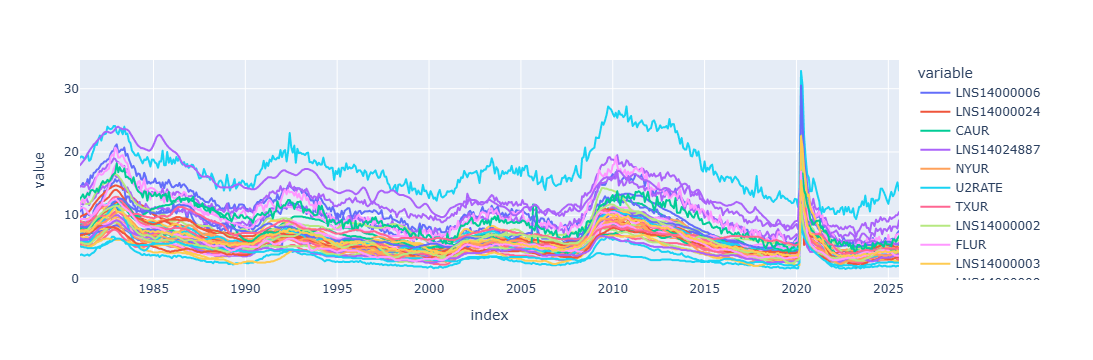

In [228]:
# line plot of unemployment rate
px.line(unemp_states)

## Pull April 2020 umemployment rate per state

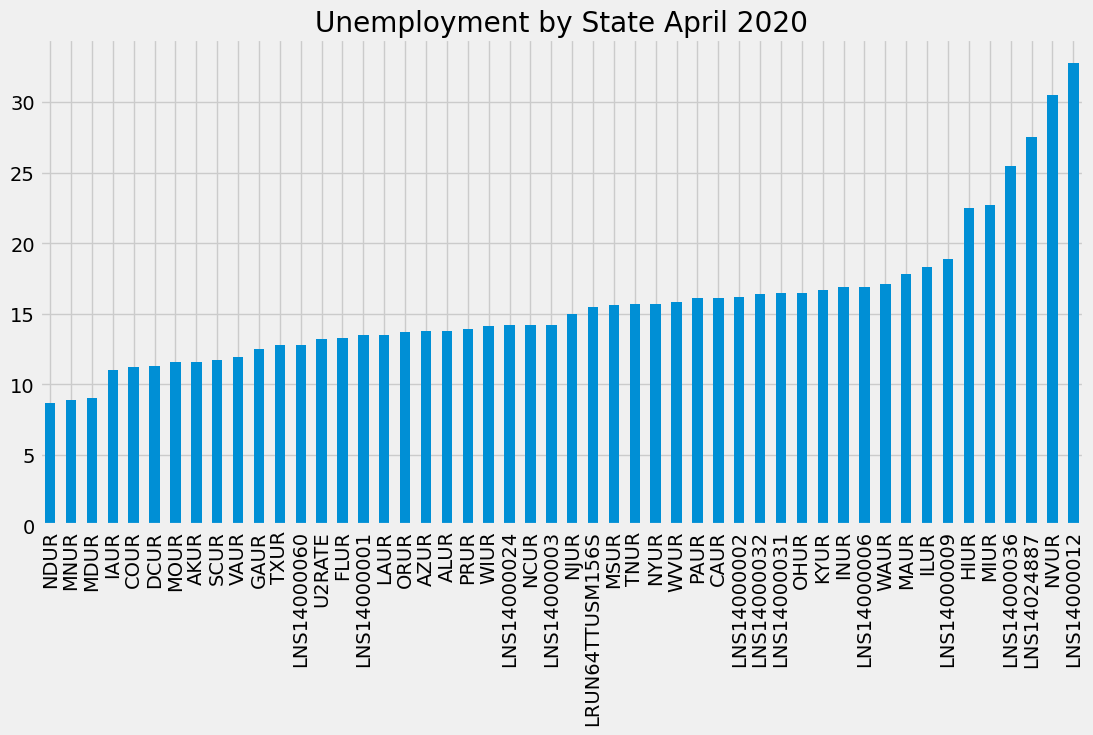

In [244]:
ax = unemp_states.loc[unemp_states.index == '2020-04-01'].T\
    .sort_values('2020-04-01').plot(kind='bar', figsize=(12,6),\
                                    title='Unemployment by State April 2020')
ax.legend().remove()
plt.show()

In [261]:
unemp_df['title'] = unemp_df['title'].str.strip('Unemployment Rate in for')

In [264]:
unemp_df = unemp_df[~unemp_df.index.str.startswith('LN')]

In [280]:
unemp_df.title

series id
CAUR                                                               C
NYUR                                                        New York
TXUR                                                           Texas
FLUR                                                          Florid
ALUR                                                            Alab
ILUR                                                        Illinois
VAUR                                                            Virg
MIUR                                                          Michig
MAUR                                                   Massachusetts
GAUR                                                           Georg
OHUR                                                              Oh
PAUR                                                        Pennsylv
NCUR                                                         North C
WAUR                                                         Washing
WIUR                    

In [273]:
unemp_df = unemp_df[~unemp_df['title'].str.startswith('he')].drop(['UNRATE','U2RATE'], axis=0)

In [291]:
unemp_df.loc['CAUR', 'title'] = unemp_df.loc['CAUR', 'title'].replace('C', 'California')

In [295]:
unemp_df = unemp_df.drop(['LRUN64TTUSM156S'], axis=0) 

In [316]:
unemp_states = unemp_states.drop(
    columns = [col for col in unemp_states.columns if col.startswith('LN')] + ['U2RATE']
)

In [321]:
unemp_states=unemp_states.drop(columns = 'LRUN64TTUSM156S')

In [323]:
unemp_states.columns

Index(['CAUR', 'NYUR', 'TXUR', 'FLUR', 'ALUR', 'ILUR', 'VAUR', 'MIUR', 'MAUR',
       'GAUR', 'OHUR', 'PAUR', 'NCUR', 'WAUR', 'WIUR', 'DCUR', 'NJUR', 'ORUR',
       'NVUR', 'KYUR', 'LAUR', 'PRUR', 'COUR', 'AZUR', 'TNUR', 'MNUR', 'WVUR',
       'HIUR', 'MSUR', 'MDUR', 'IAUR', 'MOUR', 'NDUR', 'AKUR', 'SCUR', 'INUR'],
      dtype='object')

In [324]:
id_to_states = unemp_df['title'].to_dict()

In [327]:
id_to_states

{'CAUR': 'California',
 'NYUR': 'New York',
 'TXUR': 'Texas',
 'FLUR': 'Florid',
 'ALUR': 'Alab',
 'ILUR': 'Illinois',
 'VAUR': 'Virg',
 'MIUR': 'Michig',
 'MAUR': 'Massachusetts',
 'GAUR': 'Georg',
 'OHUR': 'Oh',
 'PAUR': 'Pennsylv',
 'NCUR': 'North C',
 'WAUR': 'Washing',
 'WIUR': 'Wiscons',
 'NJUR': 'New Jers',
 'ORUR': 'Oreg',
 'NVUR': 'Nevad',
 'KYUR': 'Kentuck',
 'LAUR': 'Louis',
 'PRUR': 'Puerto Ric',
 'COUR': 'Colorad',
 'AZUR': 'Ariz',
 'TNUR': 'Tenness',
 'MNUR': 'Minnes',
 'WVUR': 'West Virg',
 'HIUR': 'Haw',
 'MSUR': 'Mississ',
 'MDUR': 'Maryland',
 'IAUR': 'Iow',
 'MOUR': 'Missou',
 'NDUR': 'North Dak',
 'AKUR': 'Alask',
 'SCUR': 'South C',
 'INUR': 'Ind'}

In [337]:
unemp_states.columns = [id_to_states.get(c,c) for c in unemp_states.columns]

In [344]:
unemp_states= unemp_states.rename(columns={
    'Florid':'Florida', 
    'Alab':'Alabama', 
    'Virg':'Virginia',
    'Michig':'Michigan', 
    'Georg':'Georgia', 
    'Oh':'Ohio', 
    'Pennsylv':'Pennsylvia', 
    'North C':'North Carolina',
    'Washing':'Washington', 
    'Wiscons':'Wisconsin', 
    'New Jers':'New Jersey', 
    'Oreg':'Oregon', 
    'Nevad':'Nevada',
    'Kentuck':'Kentucky', 
    'Louis':'Louisianna', 
    'Puerto Ric':'Puerto Rico', 
    'Colorad':'Colorado', 
    'Ariz':'Arizona', 
    'Tenness':'Tennesse',
    'Minnes':'Minnesota', 
    'West Virg':'West Virginia', 
    'Haw':'Hawaii', 
    'Mississ':'Mississipi',
    'Iow':'Iowa', 
    'Missou':'Missouri',
    'North Dak':'North Dakota', 
    'Alask':'Alaska', 
    'South C':'South Carolina', 
    'Ind':'Indiana'
})

In [345]:
unemp_states.columns

Index(['California', 'New York', 'Texas', 'Florida', 'Alabama', 'Illinois',
       'Virginia', 'Michigan', 'Massachusetts', 'Georgia', 'Ohio',
       'Pennsylvia', 'North Carolina', 'Washington', 'Wisconsin', 'Columbia',
       'New Jersey', 'Oregon', 'Nevada', 'Kentucky', 'Louisianna',
       'Puerto Rico', 'Colorado', 'Arizona', 'Tennesse', 'Minnesota',
       'West Virginia', 'Hawaii', 'Mississipi', 'Maryland', 'Iowa', 'Missouri',
       'North Dakota', 'Alaska', 'South Carolina', 'Indiana'],
      dtype='object')

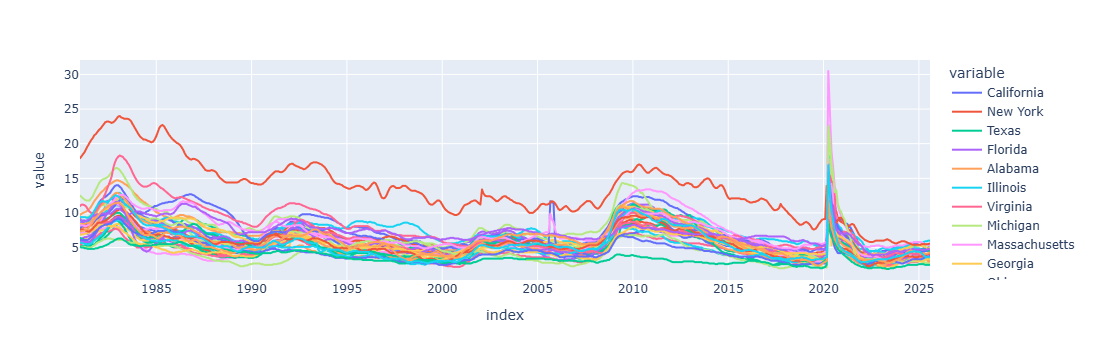

In [346]:
# line plot of unemployment rate
px.line(unemp_states)

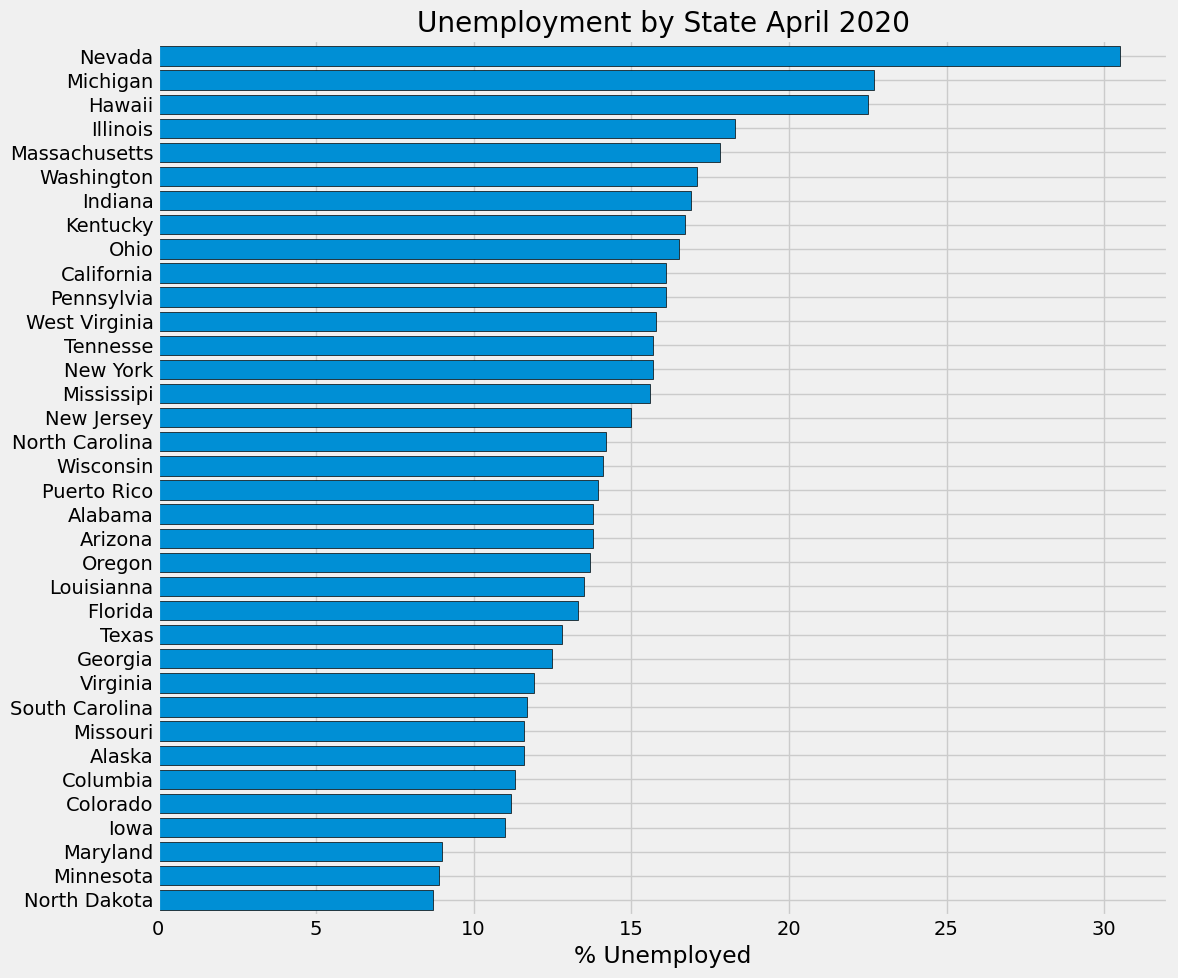

In [361]:
ax = unemp_states.loc[unemp_states.index == '2020-04-01'].T\
    .sort_values('2020-04-01').plot(kind='barh', figsize=(12,10),\
                                    width=0.8, edgecolor='black', title='Unemployment by State April 2020')
ax.set_xlabel('% Unemployed')
ax.legend().remove()
plt.tight_layout()
plt.show()

# Economic Data Analysis — Summary

This project presents a structured analysis of U.S. economic indicators using data from the Federal Reserve Economic Data (FRED) API. It demonstrates the end-to-end process of acquiring, cleaning, and analyzing time-series data to uncover insights about national and state-level unemployment trends.

## Objective

The analysis was designed to explore how unemployment rates evolved across U.S. states, identify periods of economic stress, and visualize patterns in employment changes. The project also served as a demonstration of data retrieval, wrangling, and visualization skills using Python.

## Data Source and Extraction

Data was obtained programmatically from the FRED API.

The notebook begins by creating a fred object to connect to the FRED database.

A keyword search was used to locate unemployment-related series.

Each selected series (identified by its series_id) was downloaded using fred.get_series() and converted into a pandas DataFrame.

Multiple series were combined into a unified dataset (unemp_states) for comparison.

## Data Preparation and Cleaning

The raw data contained missing values and historical periods that were not relevant to modern analysis.
Key steps included:

Filtering the dataset to include monthly frequency and seasonally adjusted percentage values.

Dropping non-state columns and columns with more than 50% missing data.

Filling remaining missing numeric values with their column mean to maintain consistency.

Removing early data (1929–1980) to focus on contemporary unemployment trends.

## Analysis and Visualization

Several exploratory analyses and visualizations were performed:

Line plots of unemployment rates were used to show national and state-level trends over time.

A focused horizontal bar chart illustrated April 2020 unemployment rates by state — highlighting the economic impact of the COVID-19 pandemic.

Sorting and formatting were applied to enhance clarity, using customized axis scaling, font adjustments, and layout optimizations to handle dense categorical labels.

## Insights

The unemployment rate surged sharply in April 2020 across nearly all states, reflecting nationwide economic shutdowns.

Certain states experienced disproportionately higher unemployment rates, emphasizing regional economic sensitivity.

The overall historical trend showed that unemployment fluctuates with broader economic cycles but rarely reached the pandemic-level highs seen in 2020.

## Tools and Skills Demonstrated

Python Libraries: pandas, matplotlib, seaborn

API Integration: Automated data retrieval from the FRED API

Data Cleaning: Handling missing values, dropping irrelevant columns, managing date indexes

Visualization: Plot styling, layout adjustment, comparative state-level analytics

Analytical Thinking: Interpretation of time-series economic data

## Outcome

The project delivers a reproducible, data-driven exploration of unemployment dynamics using real-world economic data. It effectively demonstrates your ability to integrate APIs, process complex datasets, and communicate analytical findings visually — all essential skills for data-driven research and reporting.